# Benefit of Multiplicative (MPL) Models over Nominal (Nom) Models of Systems
Testing actuator selection and feedback of Nominal and MPL models on simulations of True system

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc
# %matplotlib widget

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import simulation_nom_vs_mpl, plot_simulation_nom_vs_mpl_1, plot_simulation_nom_vs_mpl_2, actuator_comparison

## Code

In [2]:
test_set = 'System Model 4'
S_True = sys_from_file(test_set + ' True')
S_MPL = sys_from_file(test_set + ' MPL')
S_Nom = sys_from_file(test_set + ' Nominal')

System read from file @ system_model/System Model 4 True.pickle 

System read from file @ system_model/System Model 4 MPL.pickle 

System read from file @ system_model/System Model 4 Nominal.pickle 



In [3]:
ret_sim = simulation_nom_vs_mpl(S_Nom, S_MPL, S_True)

## Output

#### System Models

##### True System

max(abs(eigvals(A)))= 0.9500


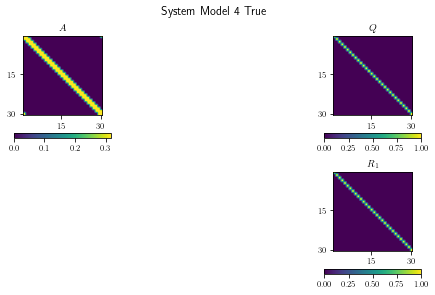

In [4]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(S_True['A'])))))
system_display_matrix(S_True)

##### Nominal Model

max(abs(eigvals(A)))= 0.9500


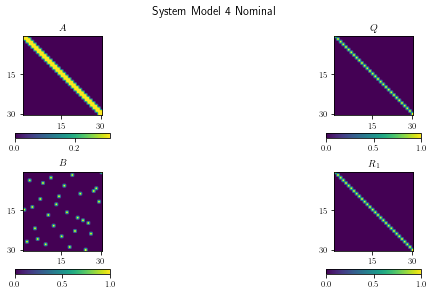

In [5]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_nom']['A'])))))
system_display_matrix(ret_sim['system_nom'])

##### Multiplicative Noise Model

max(abs(eigvals(A)))= 0.9500


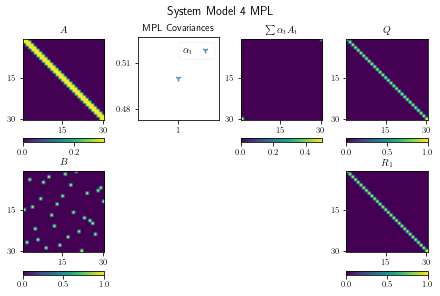

In [6]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_mpl']['A'])))))
system_display_matrix(ret_sim['system_mpl'])

#### Simulation - Trajectory, Control Input and Costs

C:\Users\kxg161630\Anaconda3\envs\work\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


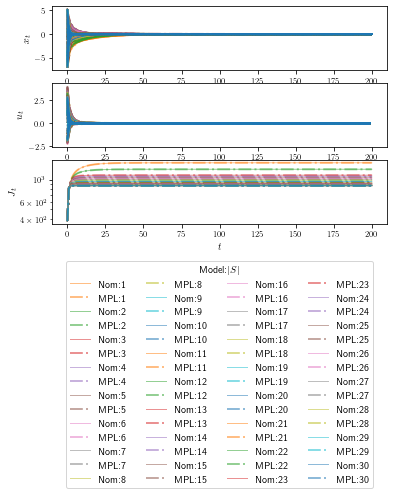

In [7]:
plot_simulation_nom_vs_mpl_1(ret_sim)

#### Actuator set comparison

Control sets are different


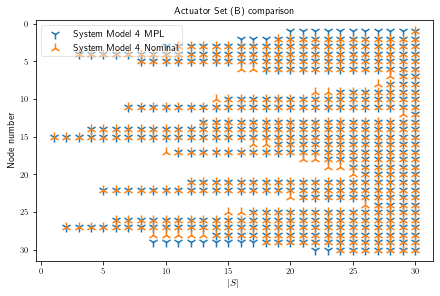

In [8]:
actuator_comparison(ret_sim['system_mpl'], ret_sim['system_nom']);

#### Simulated costs

In [9]:
print('True simulation cost with <___> feedback (4decimal approx)')
for key in ret_sim['T_Nom']['costs']:
    print ("|S|: %s | Nom: %.4f | MPL: %.4f | Diff (Nom-MPL) %.4f (%.4f %% of Nom)" % (key, ret_sim['T_Nom']['costs'][key][-1], ret_sim['T_MPL']['costs'][key][-1], ret_sim['T_Nom']['costs'][key][-1]-ret_sim['T_MPL']['costs'][key][-1], (ret_sim['T_Nom']['costs'][key][-1]-ret_sim['T_MPL']['costs'][key][-1])*100/ret_sim['T_Nom']['costs'][key][-1]))

True simulation cost with <___> feedback (4decimal approx)
|S|: 1 | Nom: 1492.7694 | MPL: 1492.7694 | Diff (Nom-MPL) -0.0000 (-0.0000 % of Nom)
|S|: 2 | Nom: 1280.8156 | MPL: 1280.5066 | Diff (Nom-MPL) 0.3089 (0.0241 % of Nom)
|S|: 3 | Nom: 1114.1547 | MPL: 1113.9239 | Diff (Nom-MPL) 0.2308 (0.0207 % of Nom)
|S|: 4 | Nom: 1083.0782 | MPL: 1082.8451 | Diff (Nom-MPL) 0.2331 (0.0215 % of Nom)
|S|: 5 | Nom: 1052.9252 | MPL: 1052.7126 | Diff (Nom-MPL) 0.2126 (0.0202 % of Nom)
|S|: 6 | Nom: 1028.6757 | MPL: 1028.4202 | Diff (Nom-MPL) 0.2555 (0.0248 % of Nom)
|S|: 7 | Nom: 1005.4750 | MPL: 1005.2309 | Diff (Nom-MPL) 0.2440 (0.0243 % of Nom)
|S|: 8 | Nom: 987.1752 | MPL: 986.8858 | Diff (Nom-MPL) 0.2894 (0.0293 % of Nom)
|S|: 9 | Nom: 965.1240 | MPL: 960.2865 | Diff (Nom-MPL) 4.8375 (0.5012 % of Nom)
|S|: 10 | Nom: 952.3236 | MPL: 943.5963 | Diff (Nom-MPL) 8.7273 (0.9164 % of Nom)
|S|: 11 | Nom: 933.1954 | MPL: 930.7929 | Diff (Nom-MPL) 2.4025 (0.2574 % of Nom)
|S|: 12 | Nom: 923.9573 | MPL: 9

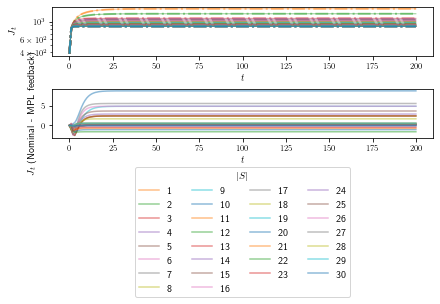

In [10]:
plot_simulation_nom_vs_mpl_2(ret_sim)

## Run Complete

In [11]:
print('Run Complete')

Run Complete
